In [1]:
import numpy as np
from lampe.data import H5Dataset
from pathlib import Path
import os
import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/mvasist/Highres/')
from DataProcuring import Data


os.environ['SCRATCH'] = os.path.join('/scratch/users/mvasist/')
scratch = os.environ.get('SCRATCH', '')
# scratch = '/users/ricolandman/Research_data/npe_crires/'
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'
datapath_old = Path(scratch) / 'highres-sbi/data'

d = Data()


In [2]:
# 835584/1024, len(validset)/1024

## Complete models

In [2]:
trainset = H5Dataset(datapath / 'train.h5')
trainset_l = H5Dataset(datapath / 'train_lessthan170.h5')
trainset_landpos = H5Dataset(datapath / 'train_lessthan170_allpositive.h5')


validset = H5Dataset(datapath / 'valid.h5')
valid = H5Dataset(datapath / 'valid_lessthan170_allpositive.h5', batch_size = 4096)

m = []

In [3]:
len(trainset), len(trainset_l), len(trainset_landpos), len(validset)

(835584, 835584, 835584, 102400)

In [4]:
for th, x in trainset:
    print(th, x)
    break

tensor([0.6428, 0.8573, 0.0514, 0.1821, 0.1558, 0.1480, 0.0516, 0.0405, 0.5537,
        0.8963, 0.8978, 0.9768, 0.7189, 0.6995, 0.4908, 0.5229, 0.2970, 0.9503,
        0.7748]) tensor([[ 0.1258,  0.1257,  0.1257,  ...,  0.1367,  0.1368,  0.1368],
        [-0.5117, -0.5115, -0.5114,  ...,  0.4880,  0.4882,  0.4883]])


In [17]:
th

tensor([0.6428, 0.8573, 0.0514, 0.1821, 0.1558, 0.1480, 0.0516, 0.0405, 0.5537,
        0.8963, 0.8978, 0.9768, 0.7189, 0.6995, 0.4908, 0.5229, 0.2970, 0.9503,
        0.7748])

In [27]:
a = torch.randn([1024, 6144])
l = torch.randn([1024])

In [28]:
a.size(), l.size()

(torch.Size([1024, 6144]), torch.Size([1024]))

In [29]:
# l - > -log p(theta | x) 
# its hitting nan values because it gives inf loss. the p is almost zero. which means the log 0 is -inf. 
# and - log p is inf. So by checking the spec that gives inf will be useful. 

In [31]:
for i in np.random.randint(4, 300, 30):
    l[i] = float('nan')

In [34]:
mask = l.isnan()
mask, mask.sum()

(tensor([False, False, False,  ..., False, False, False]), tensor(29))

In [36]:
l[mask]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan])

In [42]:
1024*90, 1024*770

(92160, 788480)

In [11]:
for j, (theta, x) in enumerate(trainset):
    # print(x.size())
#     print(j)
    if torch.isnan(x).any():
        print(j, 'there is a nan here')
#     break
#     m.append(x[0].mean())

# np.savetxt('spectral_mean.csv', m)

In [5]:
m = np.loadtxt('spectral_mean.csv')

In [6]:
np.shape(m)

(835584,)

(array([7.9533e+05, 1.3349e+04, 7.6110e+03, 5.7550e+03, 3.8390e+03,
        2.8300e+03, 1.9450e+03, 1.4280e+03, 1.0280e+03, 8.3300e+02,
        5.7200e+02, 3.9900e+02, 2.5600e+02, 1.8300e+02, 1.0200e+02,
        6.5000e+01, 3.9000e+01, 1.0000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.04206144e-10, 1.60889783e+02, 3.21779565e+02, 4.82669348e+02,
        6.43559131e+02, 8.04448914e+02, 9.65338696e+02, 1.12622848e+03,
        1.28711826e+03, 1.44800804e+03, 1.60889783e+03, 1.76978761e+03,
        1.93067739e+03, 2.09156718e+03, 2.25245696e+03, 2.41334674e+03,
        2.57423652e+03, 2.73512631e+03, 2.89601609e+03, 3.05690587e+03,
        3.21779565e+03]),
 <BarContainer object of 20 artists>)

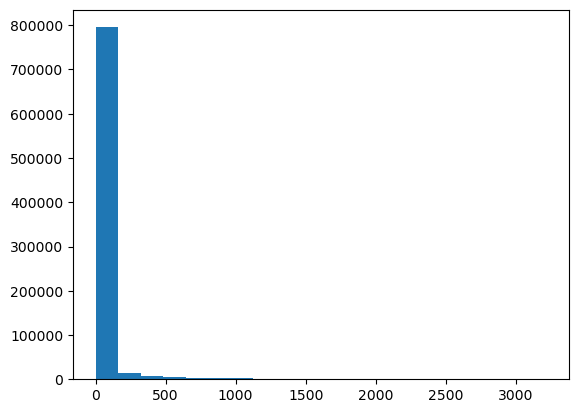

In [10]:
plt.hist(m, bins=20)
# plt.xlim(0,170)

In [23]:
m
np.median(m)

14.251608848571777

## Incomplete models

In [7]:
trainset_old = H5Dataset(datapath_old / 'train.h5')
m_old = []

In [8]:
# for theta, x in trainset_old:
#     # print(x.size())
#     m_old.append(x[0].mean())

# np.savetxt('spectral_mean_old.csv', m_old)
m_old = np.loadtxt('spectral_mean_old.csv')

In [9]:
np.shape(m_old)

(835584,)

(array([7.7116e+05, 2.4104e+04, 4.3880e+03, 4.5880e+03, 5.3280e+03,
        3.9800e+03, 3.8760e+03, 3.3680e+03, 1.6320e+03, 2.8800e+03,
        2.0440e+03, 1.9360e+03, 1.7320e+03, 1.1160e+03, 1.6200e+03,
        6.0800e+02, 8.1600e+02, 3.0800e+02, 0.0000e+00, 1.0000e+02]),
 array([1.42144648e-10, 4.45733619e+01, 8.91467238e+01, 1.33720086e+02,
        1.78293448e+02, 2.22866810e+02, 2.67440172e+02, 3.12013533e+02,
        3.56586895e+02, 4.01160257e+02, 4.45733619e+02, 4.90306981e+02,
        5.34880343e+02, 5.79453705e+02, 6.24027067e+02, 6.68600429e+02,
        7.13173791e+02, 7.57747153e+02, 8.02320515e+02, 8.46893876e+02,
        8.91467238e+02]),
 <BarContainer object of 20 artists>)

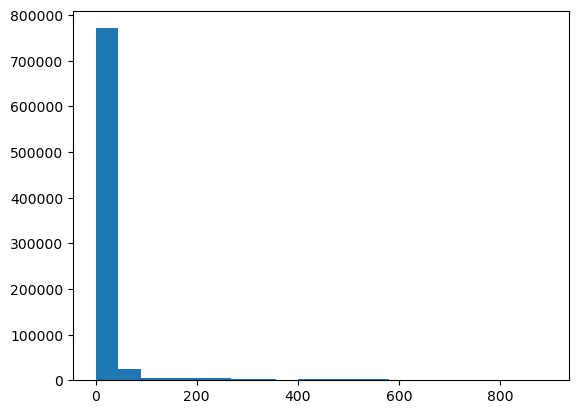

In [10]:
plt.hist(m_old*d.flux_scaling, bins=20)

## Data 

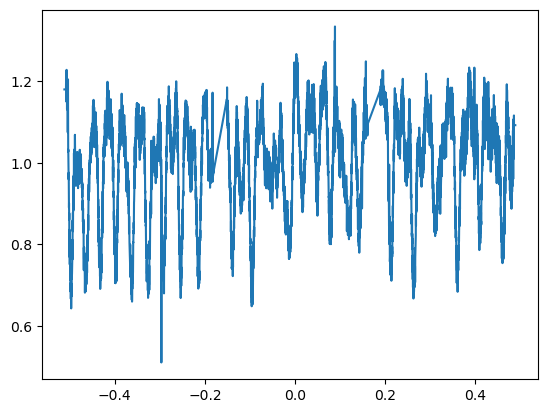

In [11]:
plt.plot(d.data_wavelengths_norm, d.flux*d.flux_scaling)
# d.data_wavelengths_norm, d.flux, d.err

In [14]:
d.flux.mean()

40049.21152810275

In [15]:
d.flux_scaling

2.4969280588665137e-05

In [26]:
d.flux.mean()*d.flux_scaling

1.0

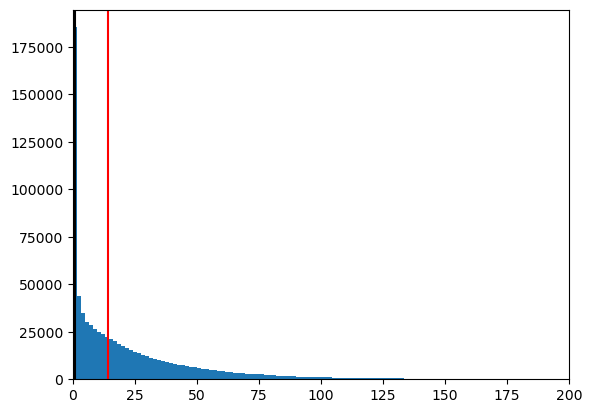

In [31]:
plt.hist(m, bins=2000)
plt.xlim(0, 200)
plt.axvline(np.median(m), c= 'red')
plt.axvline(d.flux.mean()*d.flux_scaling, c= 'black')

plt.show()

In [30]:
np.median(m)

14.251608848571777

In [32]:
Data().err * Data().flux_scaling*10

array([0.30022958, 0.30022958, 0.30022958, ..., 0.33489087, 0.33489087,
       0.33489087])

In [ ]:
'''
The models have been scaled (flux_scaling). 
These models seem to be too bright compared to the observation data, which also have been scaled. 
I need to scale these models to centre around the 

- remove everything bigger than 1e

'''

(array([5.841e+03, 2.950e+02, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 756.9818874 , 1235.13104721, 1713.28020702, 2191.42936683,
        2669.57852664, 3147.72768645, 3625.87684626, 4104.02600607,
        4582.17516588, 5060.32432569, 5538.4734855 ]),
 <BarContainer object of 10 artists>)

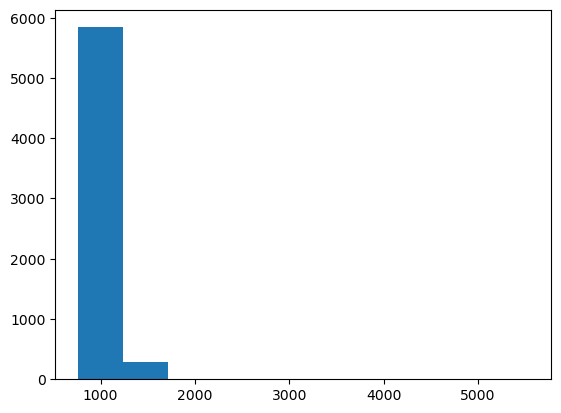

In [27]:
plt.hist(d.err)

In [47]:
er = d.err*d.flux_scaling
errr = er* 50
errr.mean()

1.3417954446041496

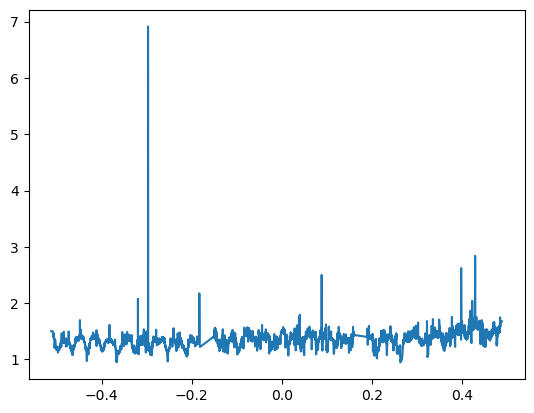

In [48]:
plt.plot(d.data_wavelengths_norm, d.err*d.flux_scaling*50)

In [16]:
batch_size = 32
block_size = 512
n_embedding = 512
n_blocks = 12
n_head = 8        

def get_batch(data):
    ix = torch.randint(len(data) - block_size, (batch_size,))
    print(ix.size(), 'ix', ix)
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     x, y = x.to(device), y.to(device)
    return x, y

In [17]:
data = torch.randn((7000)) 

In [18]:
x, y = get_batch(data)

torch.Size([32]) ix tensor([1525,   28, 3290, 6305, 5129, 3275, 3783,  871, 6433, 3152, 2728, 5394,
         964, 6352,  132, 2572, 4383, 2777,  917, 3844,  508, 4914, 5891, 2320,
        5198,  879, 5984, 5207, 6182, 1685,  461, 4624])


In [19]:
x.size(), y.size()

(torch.Size([32, 512]), torch.Size([32, 512]))

In [20]:
32*512

16384

In [ ]:
'''
These are batch_size random words picked randomly, and their progression of words word+blocksize forms a block,
that are processed parallely. each having a length of n_emb. 

the target is the words following it. 

so in my case, it would look like -

batch_size = 32
block_size = 512
n_embedding = 512
n_blocks = 12
n_head = 8  

'''

In [26]:
import tokenizers
tokenizer = tokenizers.ByteLevelBPETokenizer()
# tokenizer.train("harry-potter.txt")
vocab_size = 7000
encode = lambda s: tokenizer.encode(s).ids
decode = lambda l: tokenizer.decode(l)

In [27]:
encode

<function __main__.<lambda>(s)>